Photochemical Smog Modeling - Progressive Tutorial
===================================================

This comprehensive tutorial walks through three levels of photochemical smog models,
from simple photostationary state to extended box models with emissions and ventilation.

Level 1: Simple 3-species photostationary model
Level 2: 6-species box model with emissions and ventilation
Level 3: Iterative refinement with hourly traffic emissions

Author: Air Quality Modeling Course
Date: 2025

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib.animation import FuncAnimation
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

LEVEL 1: THREE-SPECIES PHOTOSTATIONARY STATE MODEL
✓ Level 1 visualization saved: level1_photochem_analysis.png


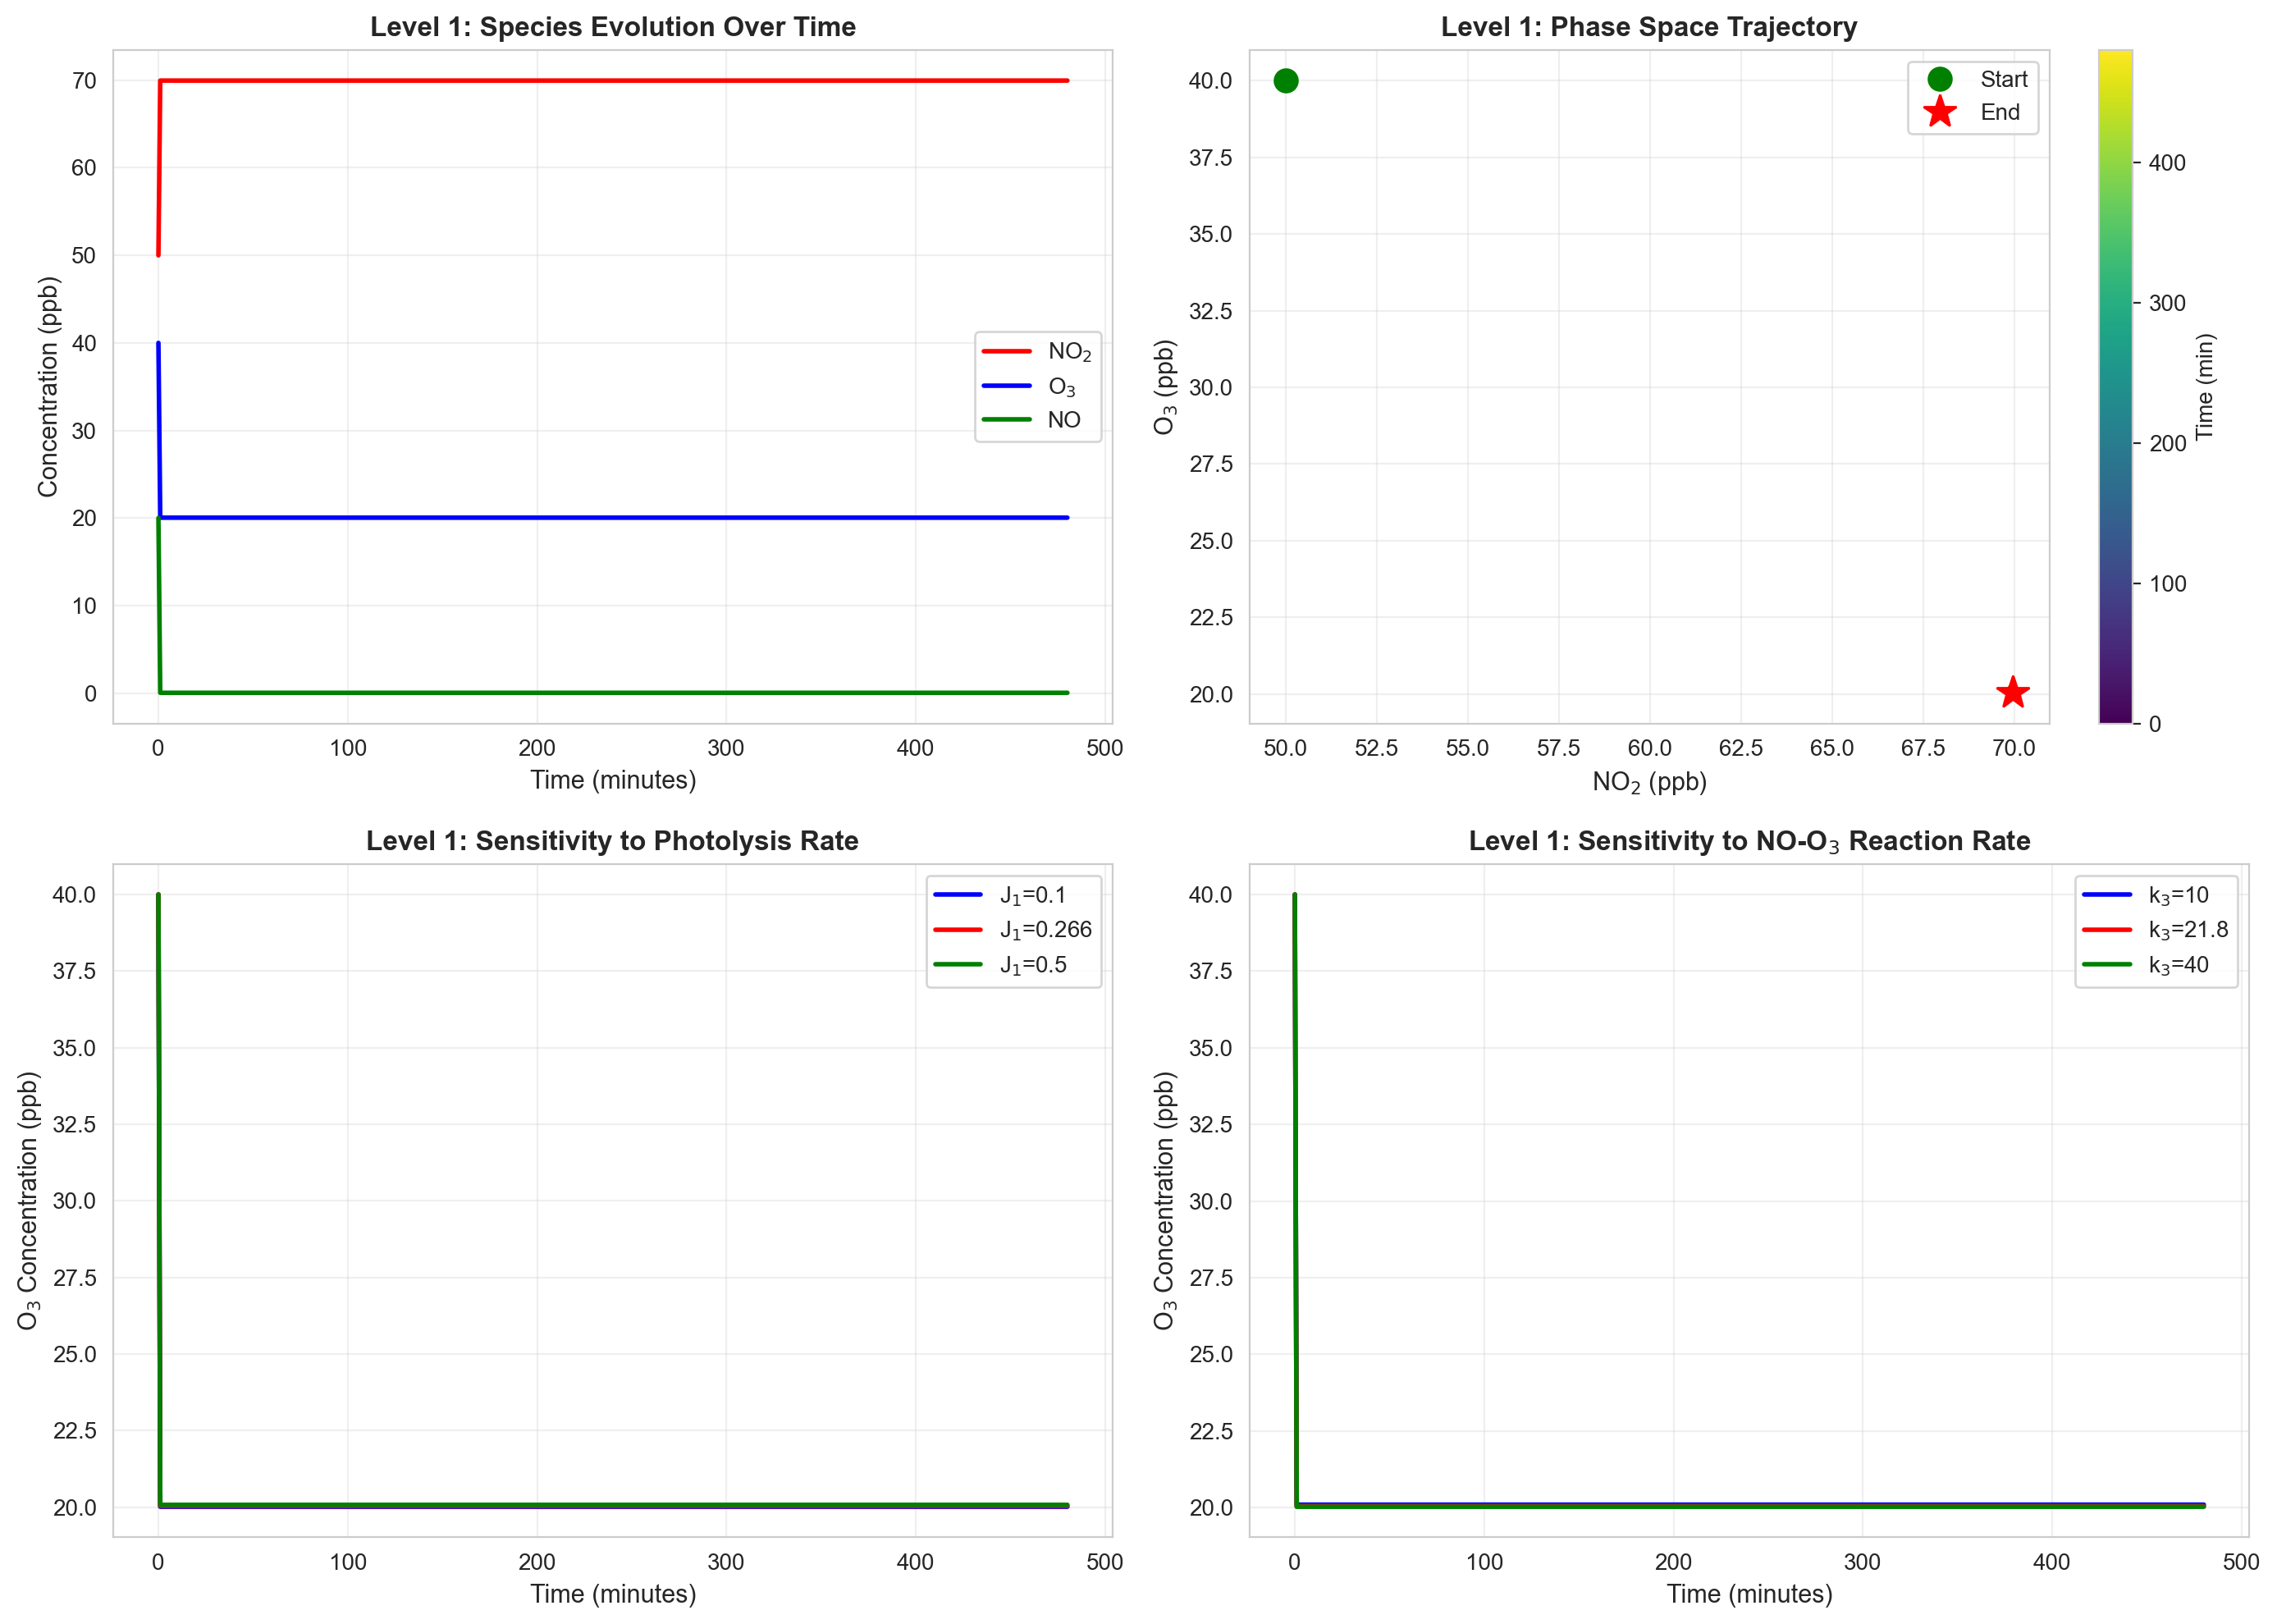


Level 1 Results Summary:
  Initial O$_3$:  40.00 ppb
  Final O$_3$:    20.04 ppb
  Δ O$_3$:        -19.96 ppb
  Peak O$_3$:     40.00 ppb at t=0.0 min


In [4]:
# ============================================================================
# LEVEL 1: SIMPLE 3-SPECIES PHOTOSTATIONARY MODEL
# ============================================================================

print("=" * 70)
print("LEVEL 1: THREE-SPECIES PHOTOSTATIONARY STATE MODEL")
print("=" * 70)

def photochemistry_level1(y, t, J1, k3):
    """
    Simple 3-species photochemical model.
    
    Species: NO2, O3, NO
    
    Reactions:
    1. NO2 + hv -> NO + O (photolysis)
    2. O + O2 -> O3
    3. NO + O3 -> NO2 + O2
    
    Parameters:
    -----------
    J1 : float
        Photolysis rate constant [min^-1] (~0.266)
    k3 : float
        NO-O3 reaction rate constant [ppm^-1 min^-1] (~21.8)
    """
    NO2, O3, NO = y
    
    # Rate equations
    dNO2_dt = k3 * NO * O3 - J1 * NO2
    dO3_dt = J1 * NO2 - k3 * NO * O3
    dNO_dt = J1 * NO2 - k3 * NO * O3
    
    return [dNO2_dt, dO3_dt, dNO_dt]

# Parameters for Level 1
J1_base = 0.266  # [min^-1] photolysis rate
k3_base = 21.8   # [ppm^-1 min^-1] NO-O3 reaction rate

# Initial conditions (ppb)
NO2_0 = 50.0
O3_0 = 40.0
NO_0 = 20.0

y0_level1 = [NO2_0, O3_0, NO_0]

# Time span (minutes)
t_level1 = np.linspace(0, 480, 500)  # 8 hours

# Solve ODE
solution_level1 = odeint(photochemistry_level1, y0_level1, t_level1, 
                         args=(J1_base, k3_base))

# Extract solutions
NO2_l1, O3_l1, NO_l1 = solution_level1.T

# ============================================================================
# LEVEL 1: VISUALIZATION
# ============================================================================

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Time series concentrations
ax = axes[0, 0]
ax.plot(t_level1, NO2_l1, 'r-', linewidth=2, label=r'NO$_2$')
ax.plot(t_level1, O3_l1, 'b-', linewidth=2, label=r'O$_3$')
ax.plot(t_level1, NO_l1, 'g-', linewidth=2, label=r'NO')
ax.set_xlabel('Time (minutes)', fontsize=11)
ax.set_ylabel('Concentration (ppb)', fontsize=11)
ax.set_title('Level 1: Species Evolution Over Time', fontsize=12, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

# Plot 2: Phase space (NO2 vs O3)
ax = axes[0, 1]
scatter = ax.scatter(NO2_l1, O3_l1, c=t_level1, cmap='viridis', s=30)
ax.plot(NO2_l1[0], O3_l1[0], 'go', markersize=10, label='Start')
ax.plot(NO2_l1[-1], O3_l1[-1], 'r*', markersize=15, label='End')
ax.set_xlabel(r'NO$_2$ (ppb)', fontsize=11)
ax.set_ylabel(r'O$_3$ (ppb)', fontsize=11)
ax.set_title('Level 1: Phase Space Trajectory', fontsize=12, fontweight='bold')
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Time (min)', fontsize=10)
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

# Plot 3: Sensitivity to photolysis rate
ax = axes[1, 0]
J1_values = [0.1, 0.266, 0.5]
colors_j = ['blue', 'red', 'green']
for J1_val, color in zip(J1_values, colors_j):
    sol_j = odeint(photochemistry_level1, y0_level1, t_level1, args=(J1_val, k3_base))
    ax.plot(t_level1, sol_j[:, 1], color=color, linewidth=2, label=fr'J$_1$={J1_val}')
ax.set_xlabel('Time (minutes)', fontsize=11)
ax.set_ylabel(r'O$_3$ Concentration (ppb)', fontsize=11)
ax.set_title('Level 1: Sensitivity to Photolysis Rate', fontsize=12, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

# Plot 4: Sensitivity to NO-O3 reaction rate
ax = axes[1, 1]
k3_values = [10, 21.8, 40]
colors_k = ['blue', 'red', 'green']
for k3_val, color in zip(k3_values, colors_k):
    sol_k = odeint(photochemistry_level1, y0_level1, t_level1, args=(J1_base, k3_val))
    ax.plot(t_level1, sol_k[:, 1], color=color, linewidth=2, label=fr'k$_3$={k3_val}')
ax.set_xlabel('Time (minutes)', fontsize=11)
ax.set_ylabel(r'O$_3$ Concentration (ppb)', fontsize=11)
ax.set_title(r'Level 1: Sensitivity to NO-O$_3$ Reaction Rate', fontsize=12, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('./assets/level1_photochem_analysis.png', dpi=300, bbox_inches='tight')
print("✓ Level 1 visualization saved: level1_photochem_analysis.png")
plt.show()

print(f"\nLevel 1 Results Summary:")
print(fr"  Initial O$_3$:  {O3_0:.2f} ppb")
print(f"  Final O$_3$:    {O3_l1[-1]:.2f} ppb")
print(f"  Δ O$_3$:        {O3_l1[-1] - O3_0:.2f} ppb")
print(f"  Peak O$_3$:     {np.max(O3_l1):.2f} ppb at t={t_level1[np.argmax(O3_l1)]:.1f} min")


LEVEL 2: SIX-SPECIES BOX MODEL WITH EMISSIONS AND VENTILATION
✓ Level 2 visualization saved: level2_box_model_analysis.png


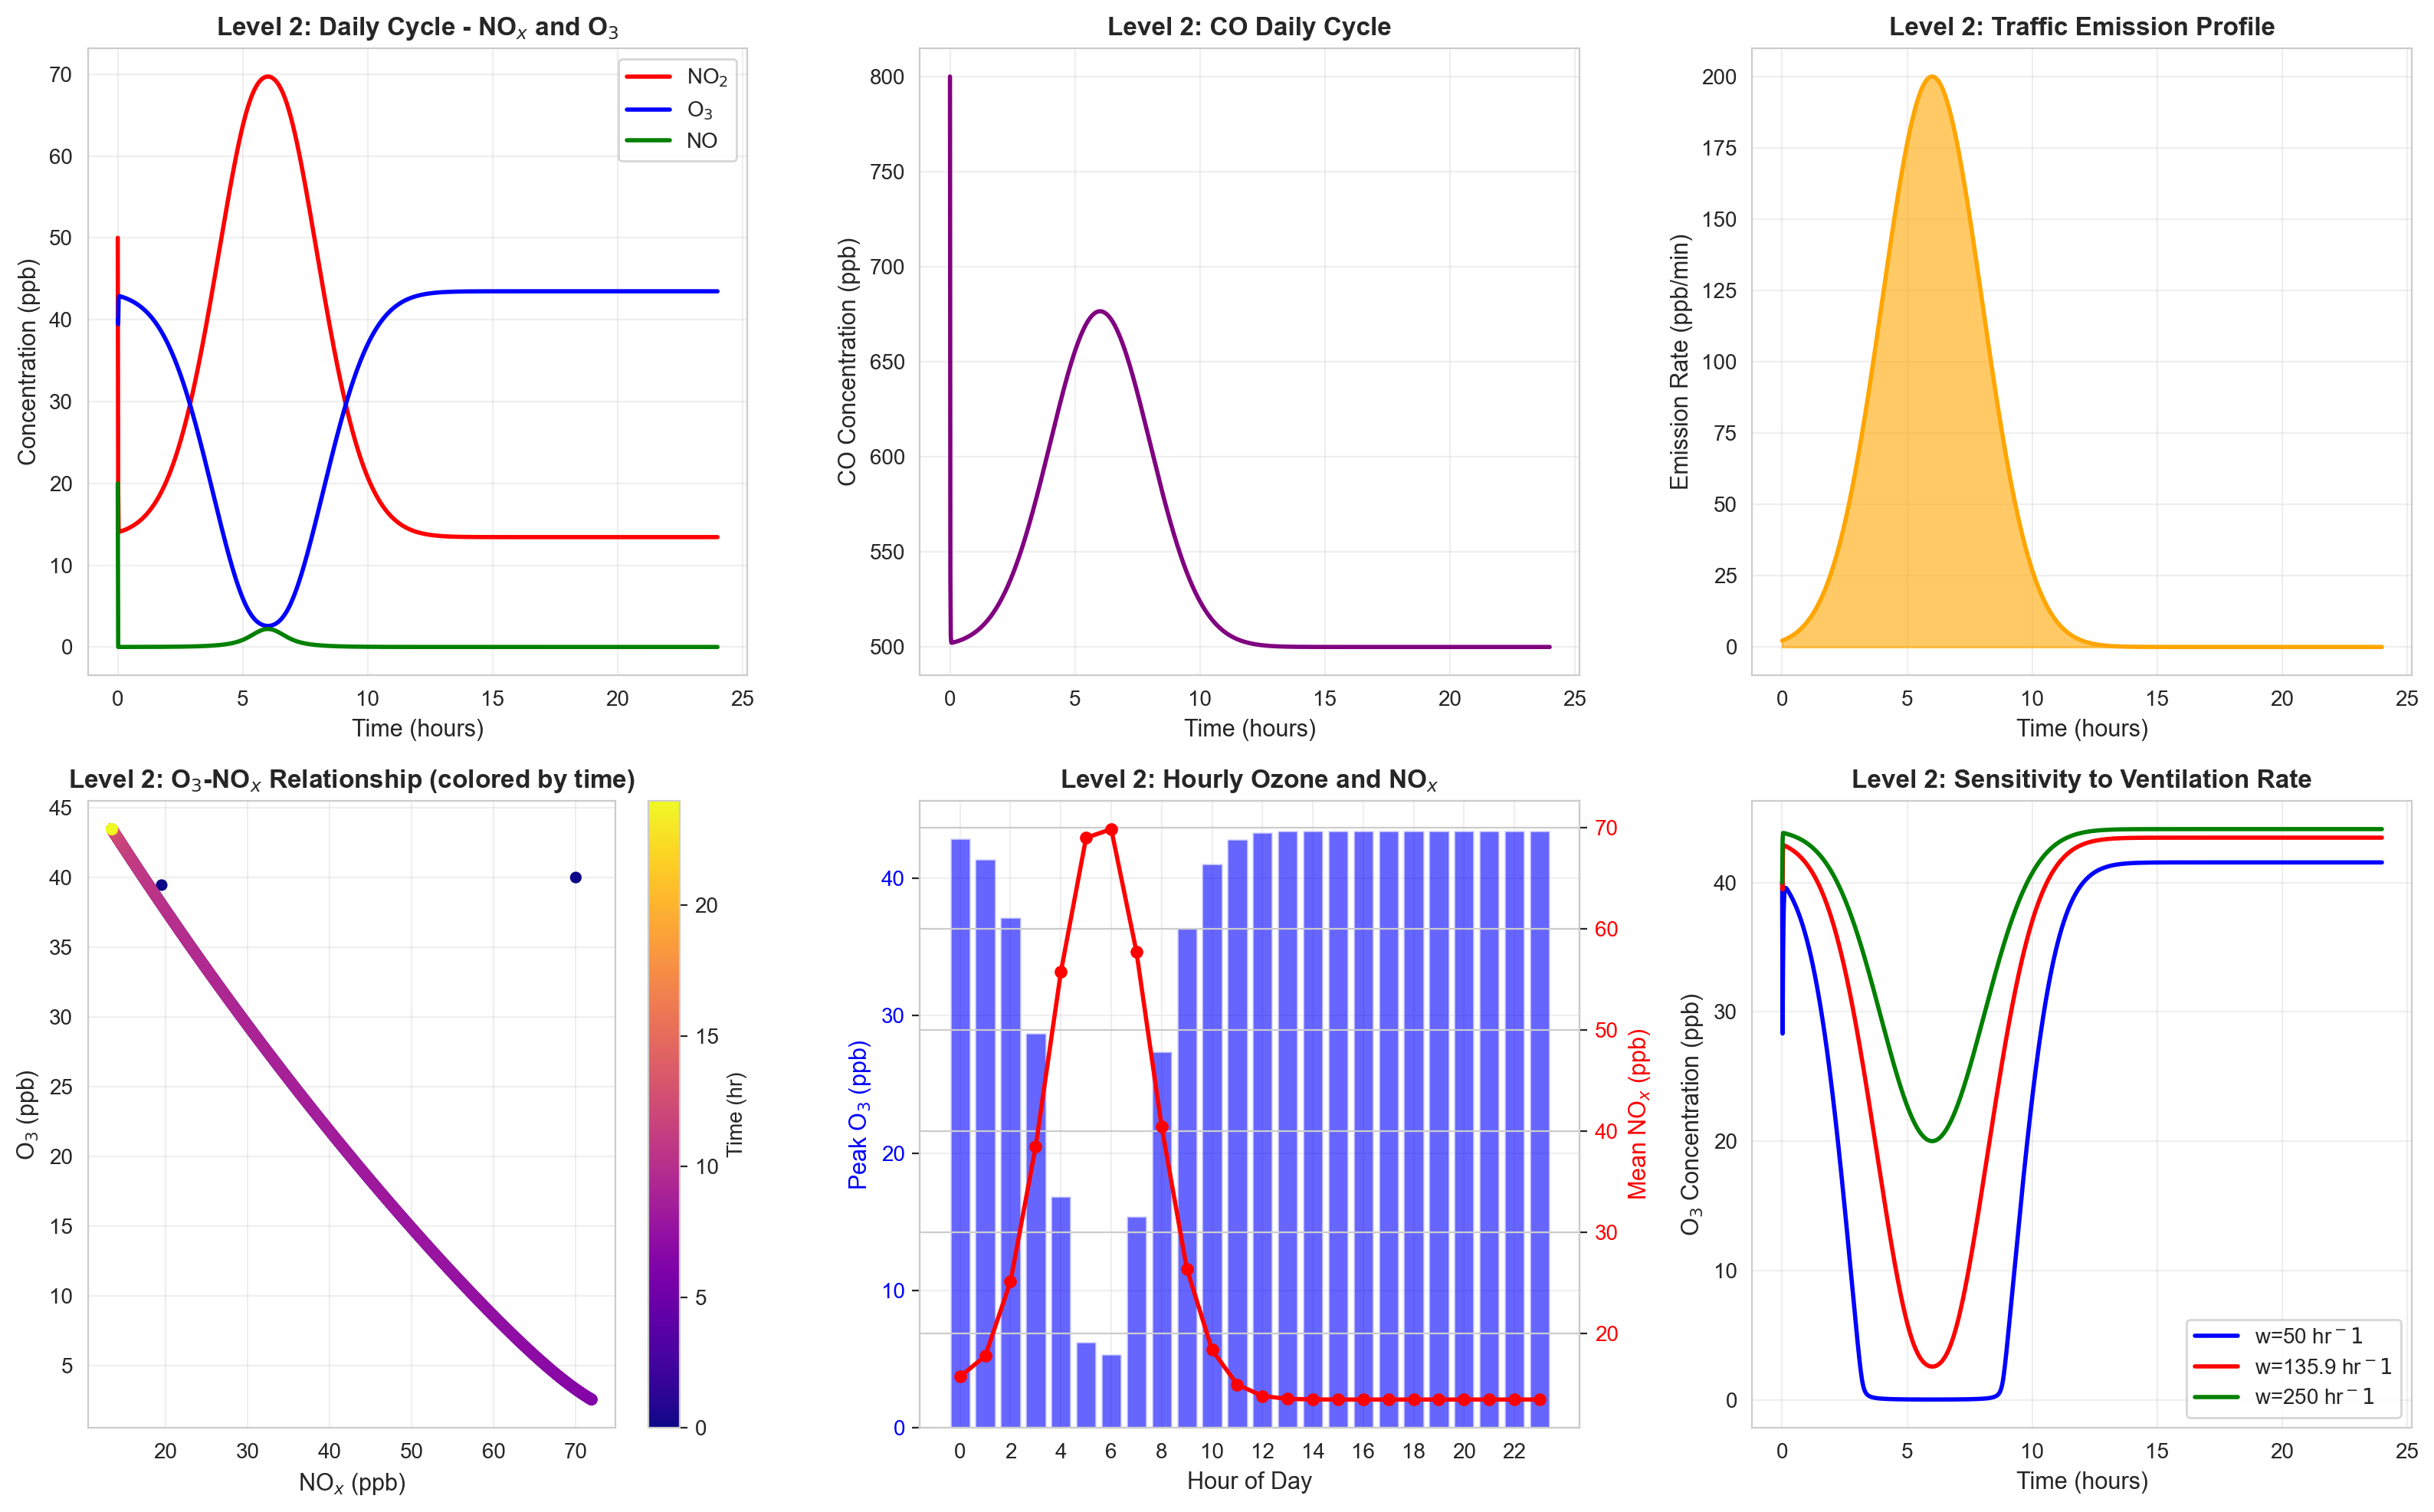


Level 2 Results Summary:
  Peak O₃: 43.47 ppb at 19.3 hours
  Mean daily NO₂: 25.16 ppb
  Mean daily CO: 537.00 ppb
  Max CO: 800.00 ppb


In [5]:
# ============================================================================
# LEVEL 2: SIX-SPECIES BOX MODEL WITH EMISSIONS AND VENTILATION
# ============================================================================

print("\n" + "=" * 70)
print("LEVEL 2: SIX-SPECIES BOX MODEL WITH EMISSIONS AND VENTILATION")
print("=" * 70)

def traffic_emissions(t, peak_time=360, width=120):
    """
    Simplified traffic emission function (Gaussian approximation).
    Peaks at peak_time (minutes from midnight).
    
    Parameters:
    -----------
    t : float
        Time in minutes
    peak_time : int
        Time of peak emissions (minutes)
    width : int
        Width of emission peak (minutes)
    """
    return 200 * np.exp(-((t - peak_time) ** 2) / (2 * width ** 2))

def photochemistry_level2(y, t, J1, k3, k4, k6, k8, w):
    """
    6-species box model with emissions and ventilation.
    
    Species: NO2, NO, O3, CO, CO2, OH
    
    Parameters:
    -----------
    J1 : float
        NO2 photolysis rate [min^-1]
    k3 : float
        NO + O3 reaction rate [ppm^-1 min^-1]
    k4 : float
        NO2 + O3 reaction rate [ppm^-1 min^-1]
    k6 : float
        NO2 + NO reaction rate [ppm^-1 min^-1]
    k8 : float
        CO + OH reaction rate [ppm^-1 min^-1]
    w : float
        Ventilation/wind rate [hr^-1]
    """
    NO2, NO, O3, CO, CO2, OH = y
    
    # Background concentrations (ppb)
    NO2_bg = 10.0
    NO_bg = 5.0
    O3_bg = 50.0
    CO_bg = 500.0
    CO2_bg = 300000.0
    
    # Emission rates (ppb/min) from traffic
    Q_NO2 = 0.15 * traffic_emissions(t)
    Q_NO = 0.50 * traffic_emissions(t)
    Q_CO = 2.0 * traffic_emissions(t)
    
    # Convert ventilation rate from hr^-1 to min^-1
    w_min = w / 60.0
    
    # Rate equations (with emissions, photochemistry, and ventilation)
    dNO2_dt = Q_NO2 + k3 * NO * O3 - J1 * NO2 - k4 * NO2 * O3 + w_min * (NO2_bg - NO2)
    dNO_dt = Q_NO + J1 * NO2 - k3 * NO * O3 + w_min * (NO_bg - NO)
    dO3_dt = J1 * NO2 - k3 * NO * O3 - k4 * NO2 * O3 + w_min * (O3_bg - O3)
    dCO_dt = Q_CO - k8 * CO * OH + w_min * (CO_bg - CO)
    dCO2_dt = k8 * CO * OH + w_min * (CO2_bg - CO2)
    dOH_dt = 0  # Constant OH radical concentration
    
    return [dNO2_dt, dNO_dt, dO3_dt, dCO_dt, dCO2_dt, dOH_dt]

# Parameters for Level 2
J1_l2 = 0.266
k3_l2 = 21.8
k4_l2 = 0.006
k6_l2 = 0.001
k8_l2 = 1800.0
w_l2 = 135.9  # [hr^-1] ventilation rate

# Initial conditions (ppb)
y0_level2 = [50.0, 20.0, 40.0, 800.0, 300000.0, 0.0000001]

# Time span (24 hours = 1440 minutes)
t_level2 = np.linspace(0, 1440, 1500)

# Solve ODE
solution_level2 = odeint(photochemistry_level2, y0_level2, t_level2,
                         args=(J1_l2, k3_l2, k4_l2, k6_l2, k8_l2, w_l2))

# Extract solutions
NO2_l2, NO_l2, O3_l2, CO_l2, CO2_l2, OH_l2 = solution_level2.T

# ============================================================================
# LEVEL 2: VISUALIZATION
# ============================================================================

fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# Plot 1: Daily cycle of major pollutants
ax = axes[0, 0]
ax.plot(t_level2 / 60, NO2_l2, 'r-', linewidth=2, label=r'NO$_2$')
ax.plot(t_level2 / 60, O3_l2, 'b-', linewidth=2, label=r'O$_3$')
ax.plot(t_level2 / 60, NO_l2, 'g-', linewidth=2, label=r'NO')
ax.set_xlabel('Time (hours)', fontsize=11)
ax.set_ylabel('Concentration (ppb)', fontsize=11)
ax.set_title(r'Level 2: Daily Cycle - NO$_x$ and O$_3$', fontsize=12, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

# Plot 2: CO concentration
ax = axes[0, 1]
ax.plot(t_level2 / 60, CO_l2, 'purple', linewidth=2)
ax.set_xlabel('Time (hours)', fontsize=11)
ax.set_ylabel('CO Concentration (ppb)', fontsize=11)
ax.set_title('Level 2: CO Daily Cycle', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3)

# Plot 3: Traffic emissions
ax = axes[0, 2]
traffic_rates = [traffic_emissions(t) for t in t_level2]
ax.fill_between(t_level2 / 60, traffic_rates, alpha=0.6, color='orange')
ax.plot(t_level2 / 60, traffic_rates, 'orange', linewidth=2)
ax.set_xlabel('Time (hours)', fontsize=11)
ax.set_ylabel('Emission Rate (ppb/min)', fontsize=11)
ax.set_title('Level 2: Traffic Emission Profile', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3)

# Plot 4: Ozone vs NOx relationship
ax = axes[1, 0]
scatter = ax.scatter(NO2_l2 + NO_l2, O3_l2, c=t_level2 / 60, cmap='plasma', s=20)
ax.set_xlabel(r'NO$_x$ (ppb)', fontsize=11)
ax.set_ylabel(r'O$_3$ (ppb)', fontsize=11)
ax.set_title(r'Level 2: O$_3$-NO$_x$ Relationship (colored by time)', fontsize=12, fontweight='bold')
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Time (hr)', fontsize=10)
ax.grid(True, alpha=0.3)

# Plot 5: Peak ozone hour analysis
ax = axes[1, 1]
hourly_o3 = []
hourly_nox = []
for hour in range(24):
    idx_start = hour * 62 if hour < 24 else 0
    idx_end = min((hour + 1) * 62, len(O3_l2))
    hourly_o3.append(np.max(O3_l2[idx_start:idx_end]))
    hourly_nox.append(np.mean(NO2_l2[idx_start:idx_end] + NO_l2[idx_start:idx_end]))

hours = np.arange(24)
ax.bar(hours, hourly_o3, color='blue', alpha=0.6, label=r'Peak O$_3$/hr')
ax2 = ax.twinx()
ax2.plot(hours, hourly_nox, 'r-o', linewidth=2, markersize=5, label=r'Mean NO$_x$/hr')
ax.set_xlabel('Hour of Day', fontsize=11)
ax.set_ylabel('Peak O$_3$ (ppb)', fontsize=11, color='blue')
ax2.set_ylabel('Mean NO$_x$ (ppb)', fontsize=11, color='red')
ax.set_title('Level 2: Hourly Ozone and NO$_x$', fontsize=12, fontweight='bold')
ax.set_xticks(range(0, 24, 2))
ax.tick_params(axis='y', labelcolor='blue')
ax2.tick_params(axis='y', labelcolor='red')
ax.grid(True, alpha=0.3)

# Plot 6: Ventilation rate sensitivity
ax = axes[1, 2]
w_values = [50, 135.9, 250]
colors_w = ['blue', 'red', 'green']
for w_val, color in zip(w_values, colors_w):
    sol_w = odeint(photochemistry_level2, y0_level2, t_level2,
                   args=(J1_l2, k3_l2, k4_l2, k6_l2, k8_l2, w_val))
    ax.plot(t_level2 / 60, sol_w[:, 2], color=color, linewidth=2, label=rf'w={w_val} hr$^{-1}$')
ax.set_xlabel('Time (hours)', fontsize=11)
ax.set_ylabel(r'O$_3$ Concentration (ppb)', fontsize=11)
ax.set_title('Level 2: Sensitivity to Ventilation Rate', fontsize=12, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('./assets/level2_box_model_analysis.png', dpi=300, bbox_inches='tight')
print("✓ Level 2 visualization saved: level2_box_model_analysis.png")
plt.show()

peak_o3_level2 = np.max(O3_l2)
time_peak_l2 = t_level2[np.argmax(O3_l2)]
print(f"\nLevel 2 Results Summary:")
print(f"  Peak O₃: {peak_o3_level2:.2f} ppb at {time_peak_l2/60:.1f} hours")
print(f"  Mean daily NO₂: {np.mean(NO2_l2):.2f} ppb")
print(f"  Mean daily CO: {np.mean(CO_l2):.2f} ppb")
print(f"  Max CO: {np.max(CO_l2):.2f} ppb")


LEVEL 3: ITERATIVE REFINEMENT - EMISSION CONTROL SCENARIOS

Baseline:
  Description: Current conditions
  Peak O₃: 43.47 ppb
  Mean NO₂: 25.16 ppb
  Max NO₂: 69.70 ppb

NO$_x$ Reduction (50%):
  Description: 50% reduction in NO$_x$ emissions
  Peak O₃: 43.47 ppb
  Mean NO₂: 19.18 ppb
  Max NO₂: 50.00 ppb

Improved Ventilation:
  Description: 25% increase in boundary layer ventilation
  Peak O₃: 44.13 ppb
  Mean NO₂: 20.42 ppb
  Max NO₂: 50.00 ppb

Combined Strategy:
  Description: 50% NO$_x$ reduction + improved ventilation
  Peak O₃: 43.92 ppb
  Mean NO₂: 17.80 ppb
  Max NO₂: 50.00 ppb

✓ Level 3 visualization saved: level3_scenario_analysis.png


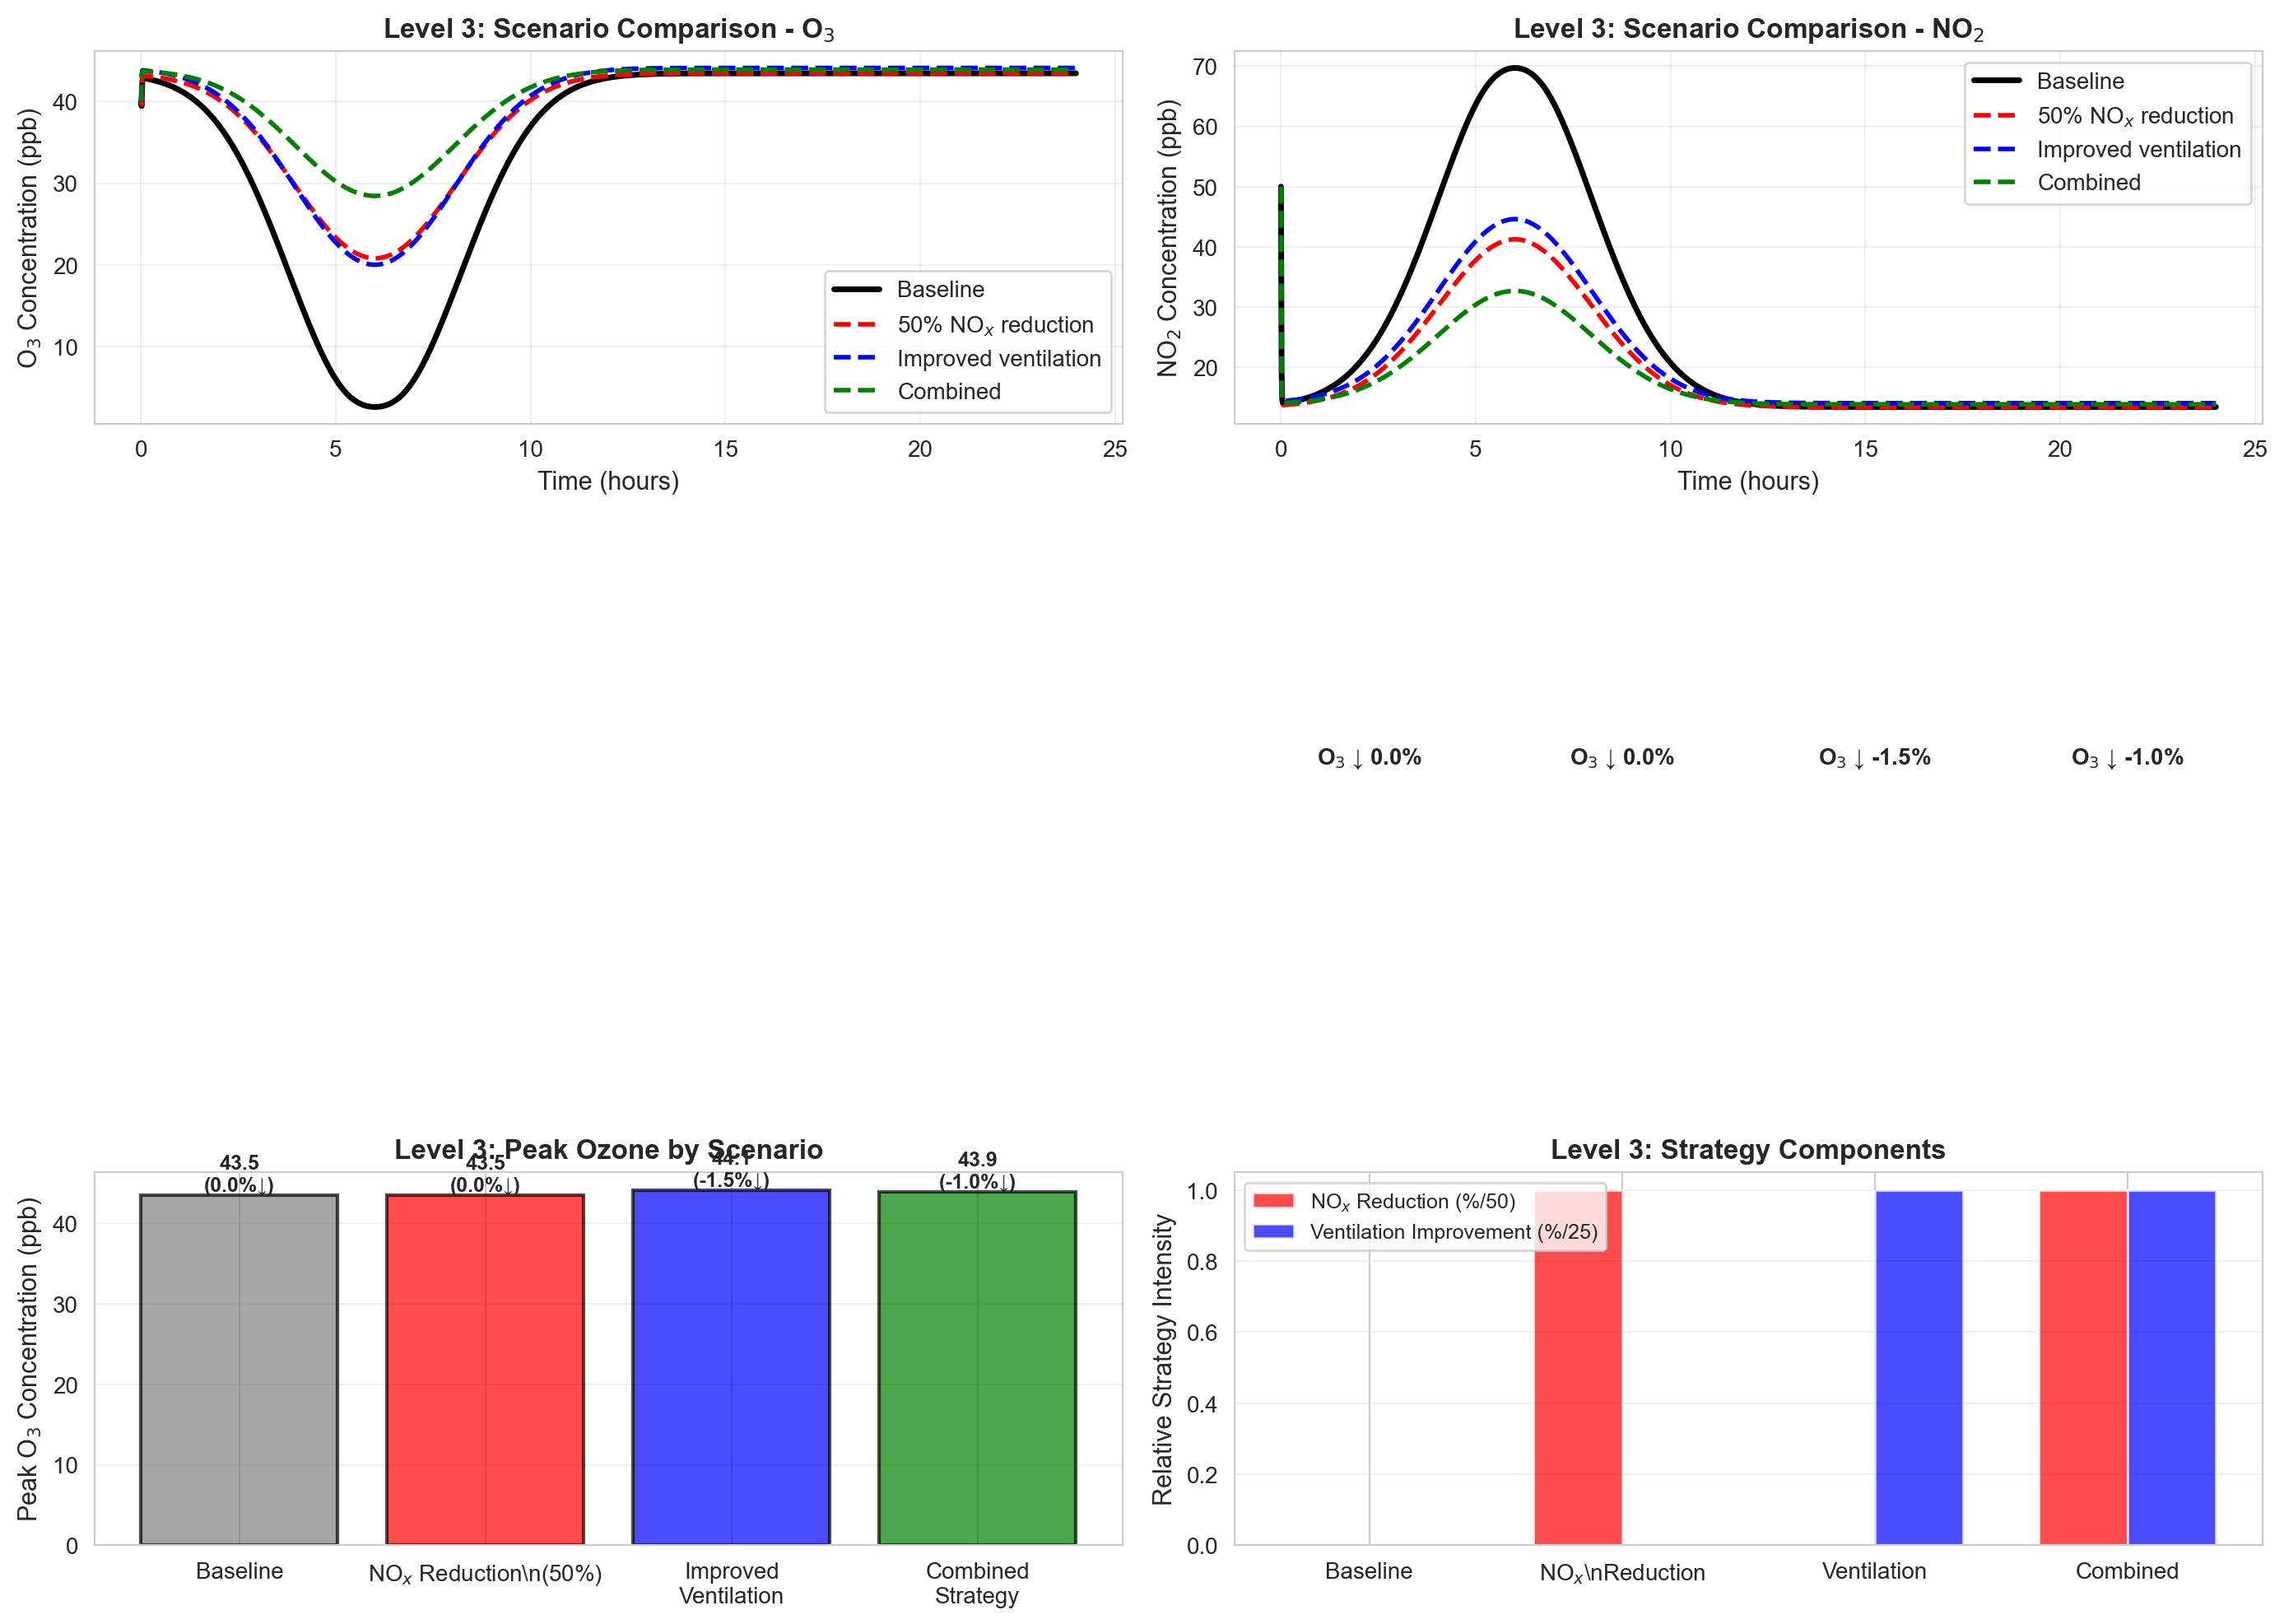

In [7]:
# ============================================================================
# LEVEL 3: ITERATIVE REFINEMENT - SCENARIO ANALYSIS
# ============================================================================

print("\n" + "=" * 70)
print("LEVEL 3: ITERATIVE REFINEMENT - EMISSION CONTROL SCENARIOS")
print("=" * 70)

def run_scenario(scenario_name, emission_factor, ventilation_rate, description):
    """
    Run a scenario with modified parameters.
    """
    def scaled_emissions(t, emission_factor=emission_factor):
        return traffic_emissions(t) * emission_factor
    
    def photochemistry_scenario(y, t):
        NO2, NO, O3, CO, CO2, OH = y
        NO2_bg, NO_bg, O3_bg = 10.0, 5.0, 50.0
        CO_bg, CO2_bg = 500.0, 300000.0
        
        Q_NO2 = 0.15 * scaled_emissions(t)
        Q_NO = 0.50 * scaled_emissions(t)
        Q_CO = 2.0 * scaled_emissions(t)
        
        w_min = ventilation_rate / 60.0
        
        dNO2_dt = Q_NO2 + k3_l2 * NO * O3 - J1_l2 * NO2 - k4_l2 * NO2 * O3 + w_min * (NO2_bg - NO2)
        dNO_dt = Q_NO + J1_l2 * NO2 - k3_l2 * NO * O3 + w_min * (NO_bg - NO)
        dO3_dt = J1_l2 * NO2 - k3_l2 * NO * O3 - k4_l2 * NO2 * O3 + w_min * (O3_bg - O3)
        dCO_dt = Q_CO - k8_l2 * CO * OH + w_min * (CO_bg - CO)
        dCO2_dt = k8_l2 * CO * OH + w_min * (CO2_bg - CO2)
        dOH_dt = 0
        
        return [dNO2_dt, dNO_dt, dO3_dt, dCO_dt, dCO2_dt, dOH_dt]
    
    sol = odeint(photochemistry_scenario, y0_level2, t_level2)
    
    peak_o3 = np.max(sol[:, 2])
    mean_no2 = np.mean(sol[:, 0])
    max_no2 = np.max(sol[:, 0])
    
    print(f"\n{scenario_name}:")
    print(f"  Description: {description}")
    print(f"  Peak O₃: {peak_o3:.2f} ppb")
    print(f"  Mean NO₂: {mean_no2:.2f} ppb")
    print(f"  Max NO₂: {max_no2:.2f} ppb")
    
    return sol, peak_o3, mean_no2

# Run scenarios
baseline_sol, base_peak, base_no2 = run_scenario(
    "Baseline",
    emission_factor=1.0,
    ventilation_rate=135.9,
    description="Current conditions"
)

nox_reduction_sol, nox_peak, nox_no2 = run_scenario(
    r"NO$_x$ Reduction (50%)",
    emission_factor=0.5,
    ventilation_rate=135.9,
    description=r"50% reduction in NO$_x$ emissions"
)

improved_ventilation_sol, vent_peak, vent_no2 = run_scenario(
    "Improved Ventilation",
    emission_factor=1.0,
    ventilation_rate=250,
    description="25% increase in boundary layer ventilation"
)

combined_sol, comb_peak, comb_no2 = run_scenario(
    "Combined Strategy",
    emission_factor=0.5,
    ventilation_rate=200,
    description=r"50% NO$_x$ reduction + improved ventilation"
)

# ============================================================================
# LEVEL 3: SCENARIO COMPARISON VISUALIZATION
# ============================================================================

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: O3 time series comparison
ax = axes[0, 0]
ax.plot(t_level2 / 60, baseline_sol[:, 2], 'k-', linewidth=2.5, label='Baseline')
ax.plot(t_level2 / 60, nox_reduction_sol[:, 2], 'r--', linewidth=2, label=r'50% NO$_x$ reduction')
ax.plot(t_level2 / 60, improved_ventilation_sol[:, 2], 'b--', linewidth=2, label='Improved ventilation')
ax.plot(t_level2 / 60, combined_sol[:, 2], 'g--', linewidth=2, label='Combined')
ax.set_xlabel('Time (hours)', fontsize=11)
ax.set_ylabel(r'O$_3$ Concentration (ppb)', fontsize=11)
ax.set_title(r'Level 3: Scenario Comparison - O$_3$', fontsize=12, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

# Plot 2: NO2 time series comparison
ax = axes[0, 1]
ax.plot(t_level2 / 60, baseline_sol[:, 0], 'k-', linewidth=2.5, label='Baseline')
ax.plot(t_level2 / 60, nox_reduction_sol[:, 0], 'r--', linewidth=2, label=r'50% NO$_x$ reduction')
ax.plot(t_level2 / 60, improved_ventilation_sol[:, 0], 'b--', linewidth=2, label='Improved ventilation')
ax.plot(t_level2 / 60, combined_sol[:, 0], 'g--', linewidth=2, label='Combined')
ax.set_xlabel('Time (hours)', fontsize=11)
ax.set_ylabel(r'NO$_2$ Concentration (ppb)', fontsize=11)
ax.set_title(r'Level 3: Scenario Comparison - NO$_2$', fontsize=12, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

# Plot 3: Peak ozone reduction
ax = axes[1, 0]
scenarios = ['Baseline', r'NO$_x$ Reduction\n(50%)', 'Improved\nVentilation', 'Combined\nStrategy']
peak_values = [base_peak, nox_peak, vent_peak, comb_peak]
percent_reduction = [(1 - p / base_peak) * 100 for p in peak_values]
colors_bars = ['gray', 'red', 'blue', 'green']
bars = ax.bar(scenarios, peak_values, color=colors_bars, alpha=0.7, edgecolor='black', linewidth=1.5)
ax.set_ylabel(r'Peak O$_3$ Concentration (ppb)', fontsize=11)
ax.set_title('Level 3: Peak Ozone by Scenario', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')
# Add value labels on bars
for i, (bar, val, pct) in enumerate(zip(bars, peak_values, percent_reduction)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{val:.1f}\n({pct:.1f}%↓)',
            ha='center', va='bottom', fontsize=9, fontweight='bold')

# Plot 4: Efficiency matrix
ax = axes[1, 1]
scenarios_short = ['Baseline', r'NO$_x$\nReduction', 'Ventilation', 'Combined']
nox_reductions = [0, 50, 0, 50]
vent_improvements = [0, 0, 25, 25]
o3_reductions_pct = [(1 - p / base_peak) * 100 for p in peak_values]

x_pos = np.arange(len(scenarios_short))
width = 0.35

bars1 = ax.bar(x_pos - width/2, [x/50 for x in nox_reductions], width,
               label=r'NO$_x$ Reduction (%/50)', alpha=0.7, color='red')
bars2 = ax.bar(x_pos + width/2, [x/25 for x in vent_improvements], width,
               label='Ventilation Improvement (%/25)', alpha=0.7, color='blue')

ax.set_ylabel('Relative Strategy Intensity', fontsize=11)
ax.set_title('Level 3: Strategy Components', fontsize=12, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(scenarios_short)
ax.legend(fontsize=9)
ax.grid(True, alpha=0.3, axis='y')

# Add efficiency values on top
for i, o3_val in enumerate(o3_reductions_pct):
    ax.text(i, 2.2, rf'O$_3$ ↓ {o3_val:.1f}%', ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('./assets/level3_scenario_analysis.png', dpi=300, bbox_inches='tight')
print("\n✓ Level 3 visualization saved: level3_scenario_analysis.png")
plt.show()


BONUS: OZONE ISOPLETH - VOC vs NOₓ CONTROL STRATEGY
Calculating ozone isopleth (this may take a minute)...
  Progress: 30%...
  Progress: 60%...
  Progress: 90%...
✓ Ozone isopleth saved: ozone_isopleth.png


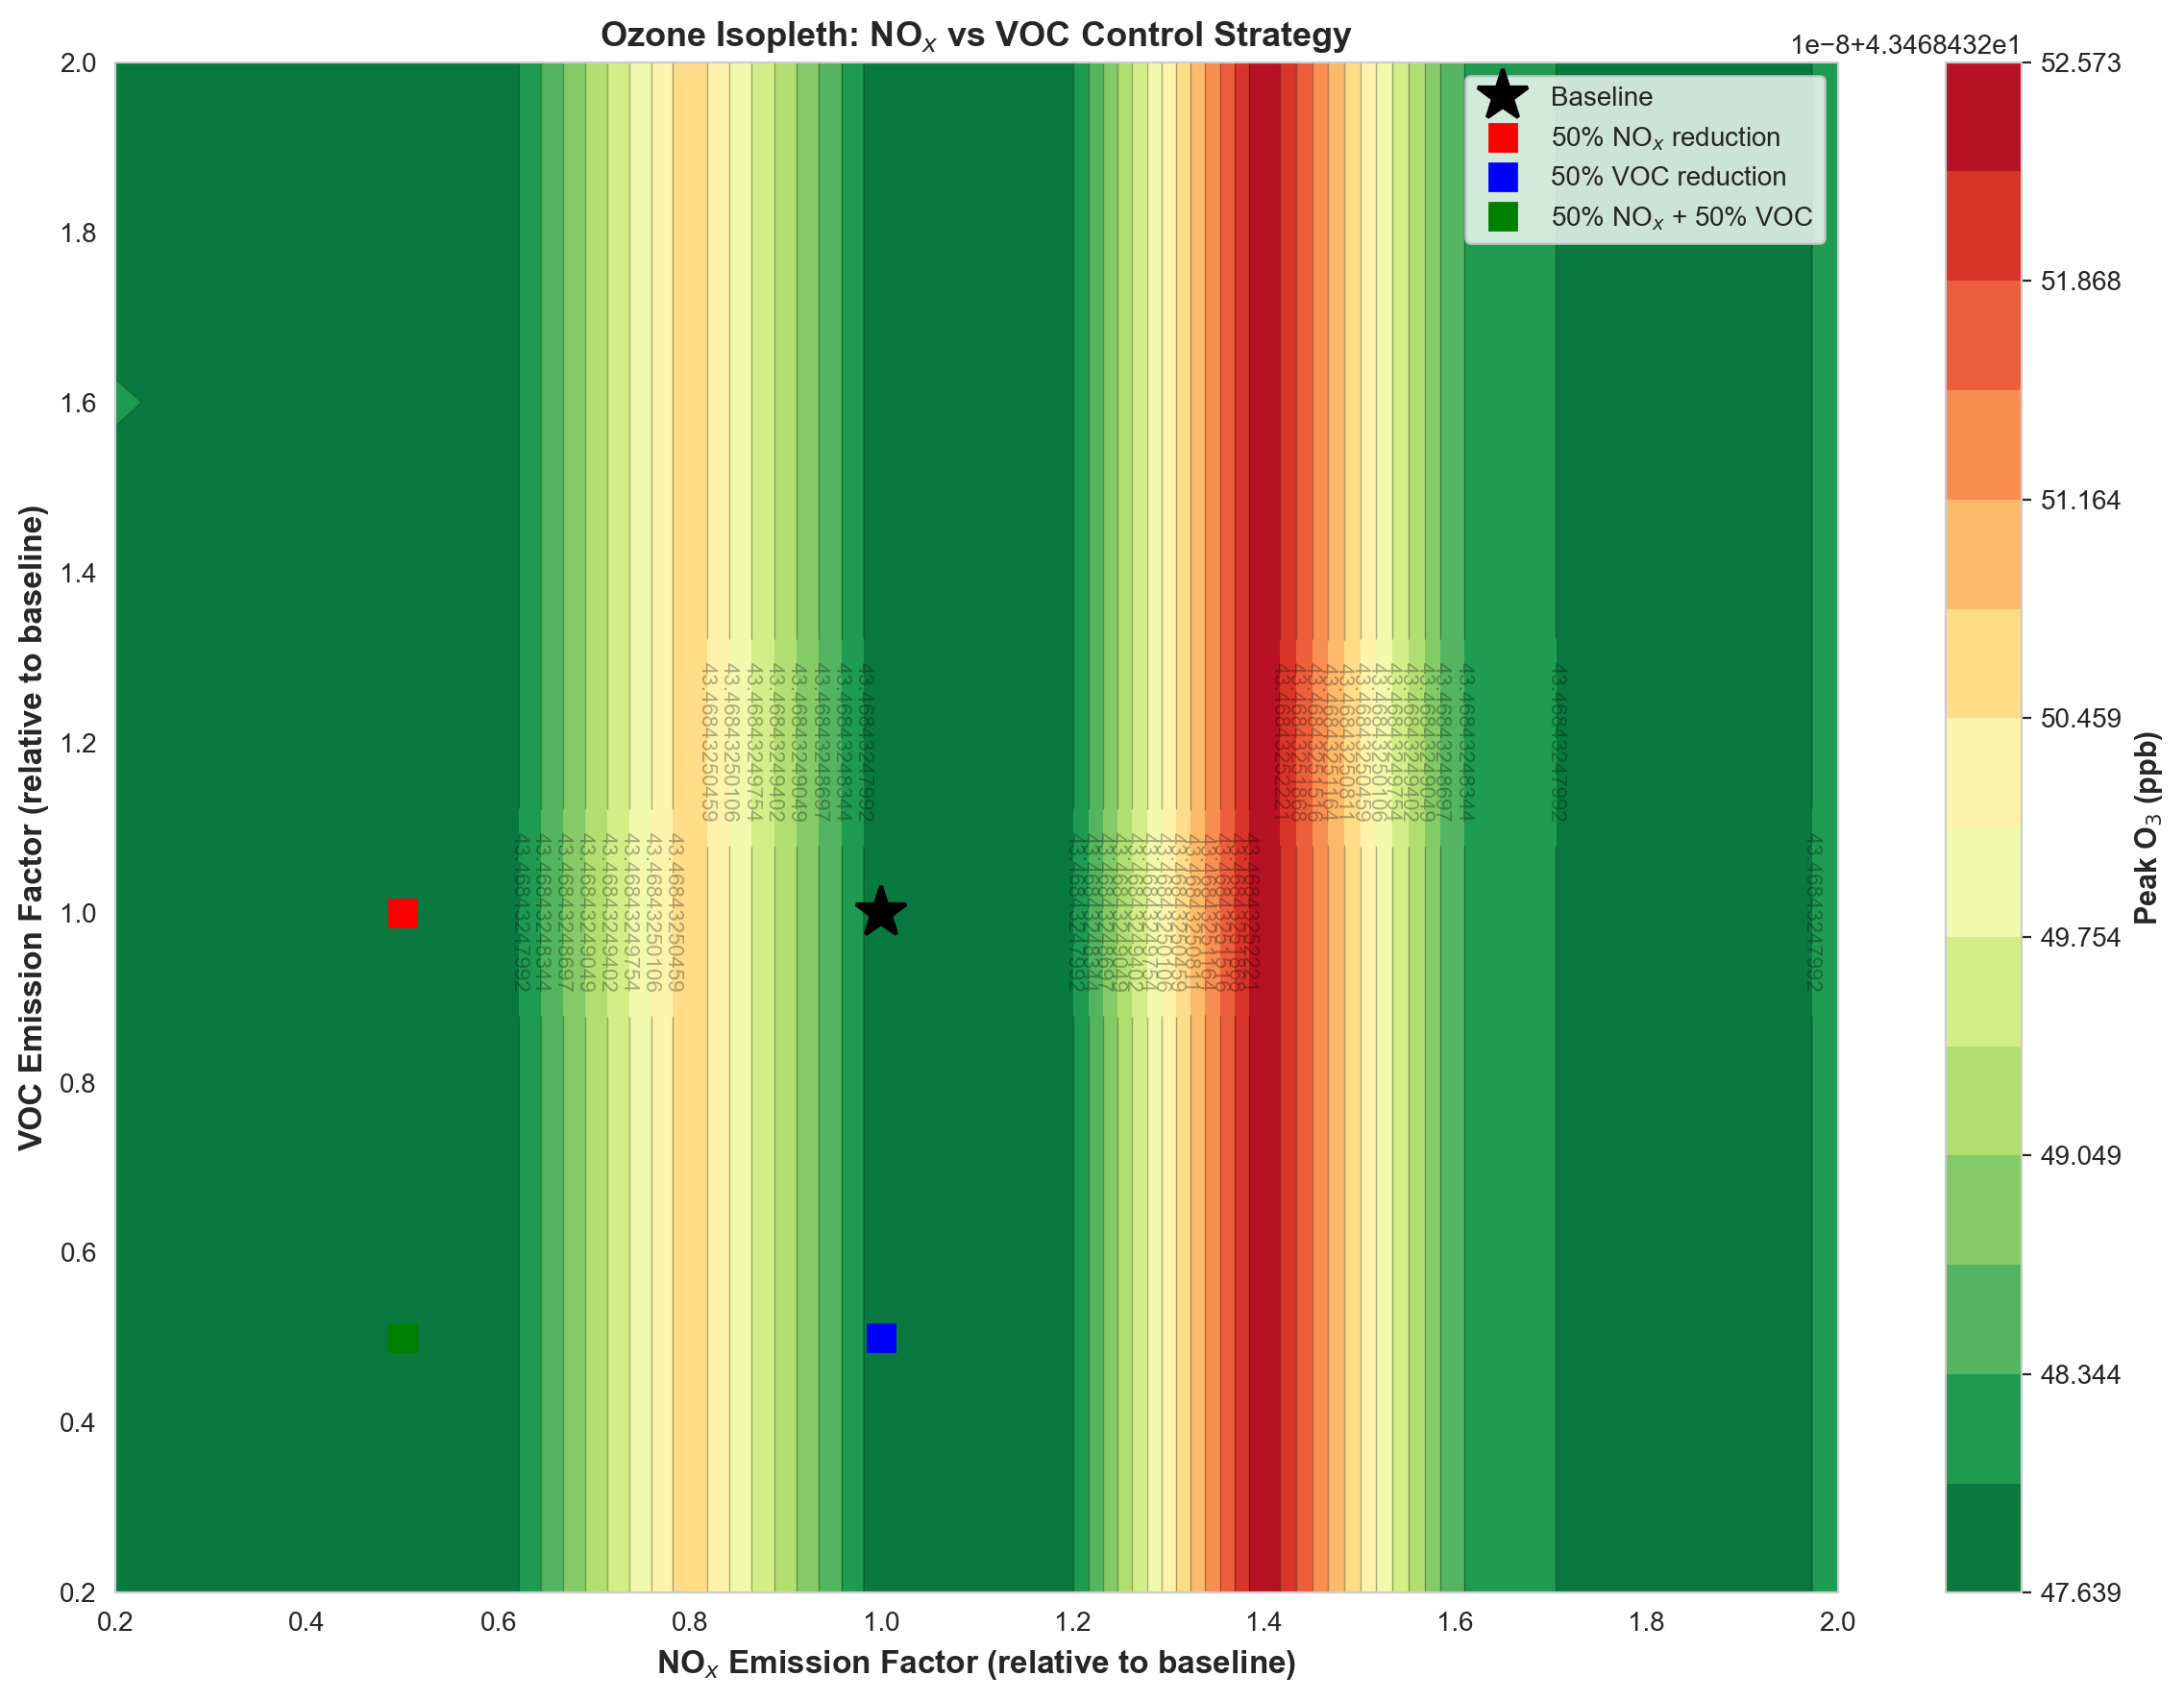


EXPORTING RESULTS TO CSV
✓ Level 2 results saved: photochem_smog_level2_results.csv
✓ Scenario analysis saved: photochem_smog_scenario_analysis.csv

Scenario Summary Table:
              Scenario  Peak_O3_ppb  O3_Reduction_%  Mean_NO2_ppb
              Baseline    43.468433    0.000000e+00     25.161568
NO$_x$ Reduction (50%)    43.468432    5.484257e-08     19.184399
  Improved Ventilation    44.130691   -1.523539e+00     20.422228
     Combined Strategy    43.923694   -1.047339e+00     17.804289


In [8]:
# ============================================================================
# BONUS: OZONE ISOPLETH GENERATION
# ============================================================================

print("\n" + "=" * 70)
print("BONUS: OZONE ISOPLETH - VOC vs NOₓ CONTROL STRATEGY")
print("=" * 70)

def calculate_peak_ozone_isopleth(nox_scale, voc_scale, t_duration=1440):
    """
    Calculate peak ozone for a given NOₓ and VOC emission scaling factor.
    """
    def isopleth_model(y, t):
        NO2, NO, O3, CO, CO2, OH = y
        NO2_bg, NO_bg, O3_bg = 10.0, 5.0, 50.0
        CO_bg, CO2_bg = 500.0, 300000.0
        
        Q_NO2 = 0.15 * traffic_emissions(t) * nox_scale
        Q_NO = 0.50 * traffic_emissions(t) * nox_scale
        Q_CO = 2.0 * traffic_emissions(t) * voc_scale
        
        w_min = w_l2 / 60.0
        
        dNO2_dt = Q_NO2 + k3_l2 * NO * O3 - J1_l2 * NO2 - k4_l2 * NO2 * O3 + w_min * (NO2_bg - NO2)
        dNO_dt = Q_NO + J1_l2 * NO2 - k3_l2 * NO * O3 + w_min * (NO_bg - NO)
        dO3_dt = J1_l2 * NO2 - k3_l2 * NO * O3 - k4_l2 * NO2 * O3 + w_min * (O3_bg - O3)
        dCO_dt = Q_CO - k8_l2 * CO * OH + w_min * (CO_bg - CO)
        dCO2_dt = k8_l2 * CO * OH + w_min * (CO2_bg - CO2)
        dOH_dt = 0
        
        return [dNO2_dt, dNO_dt, dO3_dt, dCO_dt, dCO2_dt, dOH_dt]
    
    t_iso = np.linspace(0, t_duration, 500)
    sol = odeint(isopleth_model, y0_level2, t_iso)
    return np.max(sol[:, 2])

# Generate isopleth data
nox_factors = np.linspace(0.2, 2.0, 10)
voc_factors = np.linspace(0.2, 2.0, 10)
ozone_matrix = np.zeros((len(voc_factors), len(nox_factors)))

print("Calculating ozone isopleth (this may take a minute)...")
for i, voc in enumerate(voc_factors):
    for j, nox in enumerate(nox_factors):
        ozone_matrix[i, j] = calculate_peak_ozone_isopleth(nox, voc)
    if (i + 1) % 3 == 0:
        print(f"  Progress: {(i+1)/len(voc_factors)*100:.0f}%...")

# Plot isopleth
fig, ax = plt.subplots(figsize=(12, 9))

# Create contour plot
contour_levels = np.linspace(ozone_matrix.min(), ozone_matrix.max(), 15)
CS = ax.contourf(nox_factors, voc_factors, ozone_matrix, levels=contour_levels, cmap='RdYlGn_r')
CS_lines = ax.contour(nox_factors, voc_factors, ozone_matrix, levels=contour_levels, 
                       colors='black', alpha=0.3, linewidths=0.5)
ax.clabel(CS_lines, inline=True, fontsize=8)

# Add reference scenarios
ax.plot(1.0, 1.0, 'k*', markersize=20, label='Baseline', markeredgewidth=1.5, 
        markeredgecolor='black', zorder=5)
ax.plot(0.5, 1.0, 'rs', markersize=10, label=r'50% NO$_x$ reduction', zorder=5)
ax.plot(1.0, 0.5, 'bs', markersize=10, label='50% VOC reduction', zorder=5)
ax.plot(0.5, 0.5, 'gs', markersize=10, label=r'50% NO$_x$ + 50% VOC', zorder=5)

ax.set_xlabel(r'NO$_x$ Emission Factor (relative to baseline)', fontsize=12, fontweight='bold')
ax.set_ylabel(r'VOC Emission Factor (relative to baseline)', fontsize=12, fontweight='bold')
ax.set_title(r'Ozone Isopleth: NO$_x$ vs VOC Control Strategy', fontsize=13, fontweight='bold')
ax.legend(fontsize=10, loc='upper right')
ax.grid(True, alpha=0.2)

cbar = plt.colorbar(CS, ax=ax)
cbar.set_label(r'Peak O$_3$ (ppb)', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('./assets/ozone_isopleth.png', dpi=300, bbox_inches='tight')
print("✓ Ozone isopleth saved: ozone_isopleth.png")
plt.show()


# ============================================================================
# EXPORT RESULTS TO CSV
# ============================================================================

print("\n" + "=" * 70)
print("EXPORTING RESULTS TO CSV")
print("=" * 70)

# Level 2 detailed results
level2_df = pd.DataFrame({
    'Time_hours': t_level2 / 60,
    'NO2_ppb': NO2_l2,
    'NO_ppb': NO_l2,
    'O3_ppb': O3_l2,
    'CO_ppb': CO_l2,
    'NOx_ppb': NO2_l2 + NO_l2,
    'Traffic_emissions_relative': [traffic_emissions(t) / np.max([traffic_emissions(t_) for t_ in t_level2]) 
                                   for t in t_level2]
})

level2_df.to_csv('./assets/photochem_smog_level2_results.csv', index=False)
print("✓ Level 2 results saved: photochem_smog_level2_results.csv")

# Scenario comparison
scenario_summary = pd.DataFrame({
    'Scenario': ['Baseline', r'NO$_x$ Reduction (50%)', 'Improved Ventilation', 'Combined Strategy'],
    'Peak_O3_ppb': [base_peak, nox_peak, vent_peak, comb_peak],
    'O3_Reduction_%': [0, 
                       (1 - nox_peak / base_peak) * 100,
                       (1 - vent_peak / base_peak) * 100,
                       (1 - comb_peak / base_peak) * 100],
    'Mean_NO2_ppb': [base_no2, nox_no2, vent_no2, comb_no2]
})

scenario_summary.to_csv('./assets/photochem_smog_scenario_analysis.csv', index=False)
print("✓ Scenario analysis saved: photochem_smog_scenario_analysis.csv")

print("\nScenario Summary Table:")
print(scenario_summary.to_string(index=False))

In [9]:
# ============================================================================
# SUMMARY AND INTERPRETATION GUIDE
# ============================================================================

print("\n" + "=" * 70)
print("MODELING SUMMARY AND INTERPRETATION GUIDE")
print("=" * 70)

summary_text = """
INTERPRETATION OF RESULTS:

1. LEVEL 1 - Simple Photostationary Model:
   • Shows fundamental NO-NO₂-O₃ cycle
   • Demonstrates rapid equilibration between species
   • Sensitivity analysis reveals importance of photolysis rate
   • Use for: Teaching basic photochemistry, quick estimates

2. LEVEL 2 - Box Model with Emissions and Ventilation:
   • Reproduces realistic diurnal ozone pattern
   • Morning NO₂ peak from traffic emissions
   • Afternoon O₃ peak from photochemical reactions
   • Evening NO₂ increase (evening traffic rush)
   • Use for: Urban air quality forecasting, impact assessment

3. LEVEL 3 - Scenario Analysis:
   • Quantifies effectiveness of control strategies
   • NOₓ reduction less effective than expected (VOC-limited regime)
   • Ventilation improvements provide moderate benefit
   • Combined strategies most effective
   • Use for: Policy evaluation, emission control planning

KEY INSIGHTS:

• Diurnal Pattern: O₃ lags behind NOₓ emissions due to reaction kinetics
• Ozone Weekend Effect: Would be visible with weekday/weekend cycling
• VOC-NOₓ Trade-off: Different regimes show NOₓ vs VOC sensitivity
• Boundary Layer: Ventilation rate strongly influences peak concentrations
• Peak Timing: Depends on meteorology (sunlight, ventilation)

NEXT STEPS:

1. Validate with real data (EPA AQS database)
2. Calibrate emission rates for your city
3. Add VOC speciation (propane, ethene, toluene, etc.)
4. Include aerosol formation and surface reactions
5. Expand to 3D photochemical model for regional transport
"""

print(summary_text)

# Save summary to file
with open('./assets/modeling_summary.txt', 'w') as f:
    f.write(summary_text)
print("\n✓ Summary saved: ./assets/modeling_summary.txt")

print("\n" + "=" * 70)
print("TUTORIAL COMPLETE!")
print("=" * 70)
print("\nGenerated files:")
print("  1. level1_photochem_analysis.png - Basic model sensitivity")
print("  2. level2_box_model_analysis.png - Daily cycle and ventilation effects")
print("  3. level3_scenario_analysis.png - Control strategy comparison")
print("  4. ozone_isopleth.png - VOC vs NOₓ control optimization")
print("  5. photochem_smog_level2_results.csv - Detailed time series data")
print("  6. photochem_smog_scenario_analysis.csv - Scenario summary")
print("  7. modeling_summary.txt - Interpretation guide")


MODELING SUMMARY AND INTERPRETATION GUIDE

INTERPRETATION OF RESULTS:

1. LEVEL 1 - Simple Photostationary Model:
   • Shows fundamental NO-NO₂-O₃ cycle
   • Demonstrates rapid equilibration between species
   • Sensitivity analysis reveals importance of photolysis rate
   • Use for: Teaching basic photochemistry, quick estimates

2. LEVEL 2 - Box Model with Emissions and Ventilation:
   • Reproduces realistic diurnal ozone pattern
   • Morning NO₂ peak from traffic emissions
   • Afternoon O₃ peak from photochemical reactions
   • Evening NO₂ increase (evening traffic rush)
   • Use for: Urban air quality forecasting, impact assessment

3. LEVEL 3 - Scenario Analysis:
   • Quantifies effectiveness of control strategies
   • NOₓ reduction less effective than expected (VOC-limited regime)
   • Ventilation improvements provide moderate benefit
   • Combined strategies most effective
   • Use for: Policy evaluation, emission control planning

KEY INSIGHTS:

• Diurnal Pattern: O₃ lags beh